In [5]:
import pandas, matplotlib.pyplot as plt, pylizard

In [3]:
df = pandas.read_csv('ndvi_stats_percelen.csv', sep=';', parse_dates=['date_num'])
df_gras = df.loc[df['gewasgroep']=='Grasland']

In [4]:
fig, ax = plt.subplots(figsize=[16, 9])
for i in df_gras['OBJECTID'].unique():
    x = df_gras.loc[df['OBJECTID']==i]['date_num']
    y = df_gras.loc[df['OBJECTID']==i]['MEAN']

    ax.plot(x, y)

In [6]:
x, y, dist = 221345, 451589, 5000
df_peilbuizen = pylizard.pnt2buis(x, y, dist, report=True)
df_meting = df_peilbuizen.loc[(df_peilbuizen['uuid_hand']!='') | (df_peilbuizen['uuid_diver']!='')]

m = {}
for p in df_meting.iterrows():
    print(p[0])
    m[p[0]] = pylizard.Peilbuis(p[1]['buis'], p[1]['filt'], report=True)

GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&point=6.354386713282765,52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=2&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=3&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=4&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=5&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=6&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=7&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=8&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/

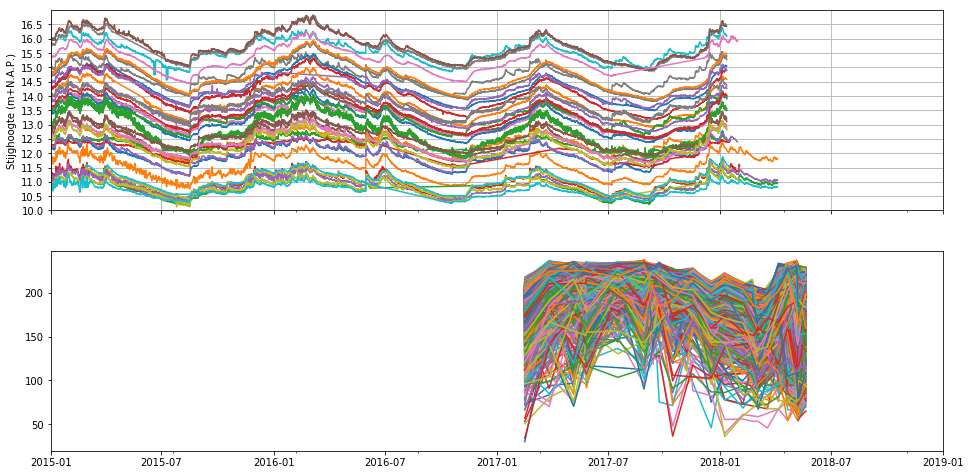

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy

fig, ax = plt.subplots(2, figsize=[16, 9], sharex=True)

h = {}
for k, v in m.items():
    #print(k, v)
    if v.uuid_diver!='':
        h = v.head_diver 
        h.loc[h<17].plot(label=k, ax=ax[0])

ax[0].set_xlabel('Datum')
ax[0].set_ylabel('Stijghoogte (m+N.A.P.)')

ax[0].set_xlim('2015', '2019')
ax[0].set_ylim(10, 17)

ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))\

ax[0].set_yticks(numpy.arange(10, 17, 0.5))

ax[0].grid()

for i in df_gras['OBJECTID'].unique():
    x = df_gras.loc[df['OBJECTID']==i]['date_num']
    y = df_gras.loc[df['OBJECTID']==i]['MEAN']

    ax[1].plot(x, y)
    
plt.show();

ValueError: Shape of passed values is (24, 2052), indices imply (24, 21)

In [70]:
list(df_gras.loc[df['OBJECTID']==1]['MEAN'].values)

[]

2954    2017-02-15
5909    2017-03-27
11133   2017-05-26
14088   2017-05-27
17041   2017-07-17
19996   2017-08-29
24472   2017-09-23
27427   2017-10-15
31283   2017-11-17
34238   2017-12-17
37085   2018-01-08
40040   2018-02-07
41229   2018-02-25
43039   2018-03-02
45327   2018-03-04
48282   2018-03-19
51149   2018-04-06
54206   2018-04-21
57161   2018-05-06
60116   2018-05-08
63051   2018-05-21
Name: date_num, dtype: datetime64[ns]

In [62]:
len(nvdi[0])

22